# Pymaceuticals Inc.
---

### Analysis

- The correlation coefficient between mouse weight and average tumor volume for the Capomulin regimen is 0.84 which is a positive number and close to 1 means there are positive relationship between mouse weight and average tumor volume. The larger the mouse weight the larger the average tumor volume.
- There is only one outlier between the four treatments which is from Infubinol treatment group.
- Ramicane treatment group showed the lowest mean, median, variance, standard devistion for the tumor volume.
 

In [320]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np
from scipy.stats import linregress

In [28]:
# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single dataset
df = study_results.merge(mouse_metadata, on = 'Mouse ID',how = 'left')

# Display the data table for preview
df.head()


,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.0,0,Capomulin,Female,9,22
1,f932,0,45.0,0,Ketapril,Male,15,29
2,g107,0,45.0,0,Ketapril,Female,2,29
3,a457,0,45.0,0,Ketapril,Female,11,30
4,c819,0,45.0,0,Ketapril,Male,21,25


In [29]:
mouse_metadata.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g)
0,k403,Ramicane,Male,21,16
1,s185,Capomulin,Female,3,17
2,x401,Capomulin,Female,16,15
3,m601,Capomulin,Male,22,17
4,g791,Ramicane,Male,11,16


In [30]:
study_results.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites
0,b128,0,45.0,0
1,f932,0,45.0,0
2,g107,0,45.0,0
3,a457,0,45.0,0
4,c819,0,45.0,0


In [32]:
# Checking the number of mice.
num_unique_id = df['Mouse ID'].nunique()
num_unique_id

249

In [38]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
dup_id = df[df.duplicated(['Mouse ID','Timepoint'])]['Mouse ID'].unique()
dup_id

array(['g989'], dtype=object)

In [54]:
# Optional: Get all the data for the duplicate mouse ID. 
dup_id_df = df.loc[df['Mouse ID'] == dup_id[0]]
dup_id_df.head(20)

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
107,g989,0,45.000000,0,Propriva,Female,21,26
137,g989,0,45.000000,0,Propriva,Female,21,26
329,g989,5,48.786801,0,Propriva,Female,21,26
360,g989,5,47.570392,0,Propriva,Female,21,26
620,g989,10,51.745156,0,Propriva,Female,21,26
681,g989,10,49.880528,0,Propriva,Female,21,26
815,g989,15,51.325852,1,Propriva,Female,21,26
869,g989,15,53.442020,0,Propriva,Female,21,26
950,g989,20,55.326122,1,Propriva,Female,21,26
1111,g989,20,54.657650,1,Propriva,Female,21,26


In [63]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
clean_df = df[df['Mouse ID'].isin(dup_id)==False]
clean_df.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.0,0,Capomulin,Female,9,22
1,f932,0,45.0,0,Ketapril,Male,15,29
2,g107,0,45.0,0,Ketapril,Female,2,29
3,a457,0,45.0,0,Ketapril,Female,11,30
4,c819,0,45.0,0,Ketapril,Male,21,25


In [64]:
# Checking the number of mice in the clean DataFrame.
num_clean_mice = clean_df['Mouse ID'].nunique()
num_clean_mice

248

## Summary Statistics

In [71]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
mean = clean_df.groupby('Drug Regimen')['Tumor Volume (mm3)'].mean()
median = clean_df.groupby('Drug Regimen')['Tumor Volume (mm3)'].median()
variance = clean_df.groupby('Drug Regimen')['Tumor Volume (mm3)'].var()
standard_deviation = clean_df.groupby('Drug Regimen')['Tumor Volume (mm3)'].std()
sem = clean_df.groupby('Drug Regimen')['Tumor Volume (mm3)'].sem()
# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume. 
# Assemble the resulting series into a single summary DataFrame.
summary_df = pd.DataFrame({"Mean Tumor Volume":mean,
                      "Median Tumor Volume": median,
                      "Tumor Volume Variance": variance,
                      'Tumor Volume Std. Dev.': standard_deviation,
                      'Tumor Volume Std. Err.': sem})
summary_df

,Mean Tumor Volume,Median Tumor Volume,Tumor Volume Variance,Tumor Volume Std. Dev.,Tumor Volume Std. Err.
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [73]:
# Generate a summary statistics table of mean, median, variance, standard deviation, 
# and SEM of the tumor volume for each regimen

# Using the aggregation method, produce the same summary statistics in a single line.
summary_agg_df = clean_df.groupby('Drug Regimen')[['Tumor Volume (mm3)']].agg(['mean','median','var','std','sem'])
summary_agg_df

Tumor Volume (mm3)                                          
                           mean     median        var       std       sem
Drug Regimen                                                             
Capomulin             40.675741  41.557809  24.947764  4.994774  0.329346
Ceftamin              52.591172  51.776157  39.290177  6.268188  0.469821
Infubinol             52.884795  51.820584  43.128684  6.567243  0.492236
Ketapril              55.235638  53.698743  68.553577  8.279709  0.603860
Naftisol              54.331565  52.509285  66.173479  8.134708  0.596466
Placebo               54.033581  52.288934  61.168083  7.821003  0.581331
Propriva              52.320930  50.446266  43.852013  6.622085  0.544332
Ramicane              40.216745  40.673236  23.486704  4.846308  0.320955
Stelasyn              54.233149  52.431737  59.450562  7.710419  0.573111
Zoniferol             53.236507  51.818479  48.533355  6.966589  0.516398

## Bar and Pie Charts

Text(0, 0.5, 'Number of Mice Tested')

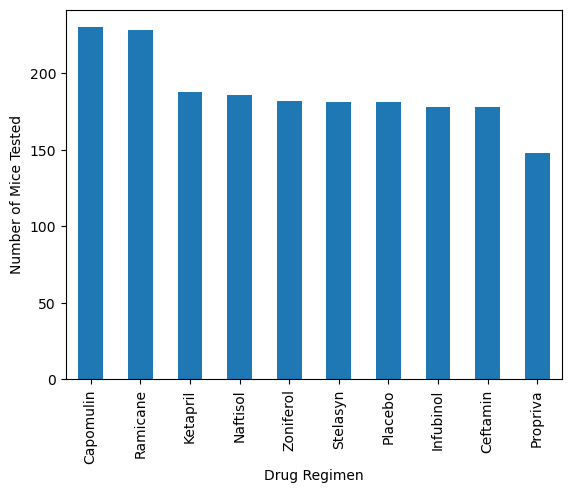

In [83]:
# Generate a bar plot showing the total number of timepoints for all mice tested for each drug regimen using Pandas.
num_drug = clean_df['Drug Regimen'].value_counts()
num_drug.plot(kind = 'bar')
plt.xlabel("Drug Regimen")
plt.ylabel("Number of Mice Tested")

Text(0, 0.5, 'Number of Mice Tested')

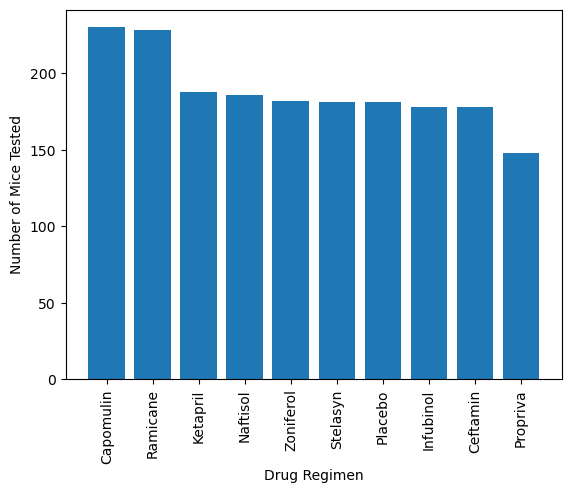

In [93]:
# Generate a bar plot showing the total number of timepoints for all mice tested for each drug regimen using pyplot.
x = num_drug.index
y = num_drug.values
plt.bar(x,y)
plt.xlabel("Drug Regimen")
plt.xticks(rotation='vertical')
plt.ylabel("Number of Mice Tested")

<Axes: ylabel='Sex'>

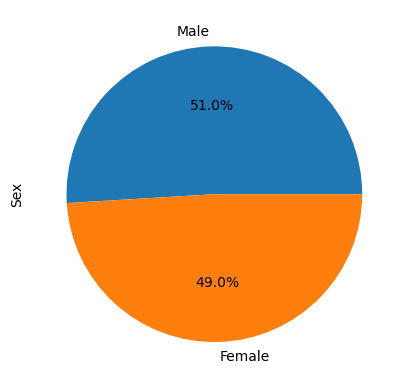

In [99]:
# Generate a pie plot showing the distribution of female versus male mice using Pandas
num_sex = clean_df['Sex'].value_counts()
num_sex.plot(kind = 'pie',autopct='%1.1f%%')

Text(0, 0.5, 'Sex')

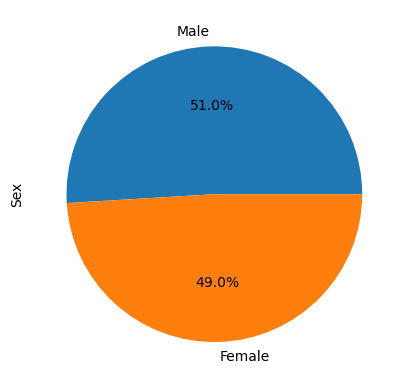

In [103]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
labels = ['Male','Female']
sizes = num_sex.values
plt.pie(sizes,labels=labels,autopct='%1.1f%%')
plt.ylabel('Sex')

## Quartiles, Outliers and Boxplots

In [142]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin
# capomulin_df = clean_df.loc[clean_df['Drug Regimen'] == 'Capomulin']
# ramicane_df = clean_df.loc[clean_df['Drug Regimen'] == 'Ramicane']
# infubinol_df = clean_df.loc[clean_df['Drug Regimen'] == 'Infubinol']
# ceftamin_df = clean_df.loc[clean_df['Drug Regimen'] == 'Ceftamin']

# Start by getting the last (greatest) timepoint for each mouse
# def treatment(df):
#         greatest_time = df.groupby('Mouse ID')['Timepoint'].max()
#         d = {'Mouse ID': greatest_time.index,
#              'Timepoint': greatest_time.values}
#         greatest_time_df = pd.DataFrame(d)
#         # Merge this group df with the original DataFrame to get the tumor volume at the last timepoint
#         last_vol_df = pd.merge(greatest_time_df,clean_df,on=['Mouse ID','Timepoint'],how = 'left')
#         return last_vol_df

# last_vol_ca_df = treatment(capomulin_df)
# last_vol_ra_df = treatment(ramicane_df)
# last_vol_in_df = treatment(infubinol_df)
# last_vol_ce_df = treatment(ceftamin_df)

greatest_time = clean_df.groupby('Mouse ID')['Timepoint'].max()
d = {'Mouse ID': greatest_time.index,
     'Timepoint': greatest_time.values}
greatest_time_df = pd.DataFrame(d)
# Merge this group df with the original DataFrame to get the tumor volume at the last timepoint
last_vol_df = pd.merge(greatest_time_df,clean_df,on=['Mouse ID','Timepoint'],how = 'left')
last_vol_df

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,a203,45,67.973419,2,Infubinol,Female,20,23
1,a251,45,65.525743,1,Infubinol,Female,21,25
2,a262,45,70.717621,4,Placebo,Female,17,29
3,a275,45,62.999356,3,Ceftamin,Female,20,28
4,a366,30,63.440686,1,Stelasyn,Female,16,29
...,...,...,...,...,...,...,...,...
243,z435,10,48.710661,0,Propriva,Female,12,26
244,z578,45,30.638696,0,Ramicane,Male,11,16
245,z581,45,62.754451,3,Infubinol,Female,24,25
246,z795,45,65.741070,3,Naftisol,Female,13,29


In [253]:
# function for finding outlier(s)
def outliers(lst):
    quartiles = lst.quantile([0.25, 0.5, 0.75])
    lowerq = quartiles[0.25]
    upperq = quartiles[0.75]
    # print(f"The lower quartile of tumor volumes is: {lowerq}")
    # print(f"The upper quartile of tumor volumes is: {upperq}")
    iqr = upperq - lowerq
    lower_bound = lowerq - 1.5*iqr
    upper_bound = upperq + 1.5*iqr
    # print(f"Values below {lower_bound} could be outliers.")
    # print(f"Values above {upper_bound} could be outliers.")
    return lst[(lst > upper_bound) | (lst < lower_bound)]

In [254]:
# Put treatments into a list for for loop (and later for plot labels)
treatment = ['Capomulin','Ramicane','Infubinol','Ceftamin']

# Create empty list to fill with tumor vol data (for plotting)
tumor_vol = []

# Calculate the IQR and quantitatively determine if there are any potential outliers. 

for treat in treatment:
    tumor_vol = []
    # Locate the rows which contain mice on each drug and get the tumor volumes
    select_rows_df = last_vol_df.loc[last_vol_df['Drug Regimen'] == treat]
    # add subset
    # Determine outliers using upper and lower bounds
    outlier = outliers(select_rows_df['Tumor Volume (mm3)'])
    print("{}'s potential outliers: {}".format(treat,outlier))


Capomulin's potential outliers: Series([], Name: Tumor Volume (mm3), dtype: float64)
Ramicane's potential outliers: Series([], Name: Tumor Volume (mm3), dtype: float64)
Infubinol's potential outliers: 31    36.321346
Name: Tumor Volume (mm3), dtype: float64
Ceftamin's potential outliers: Series([], Name: Tumor Volume (mm3), dtype: float64)


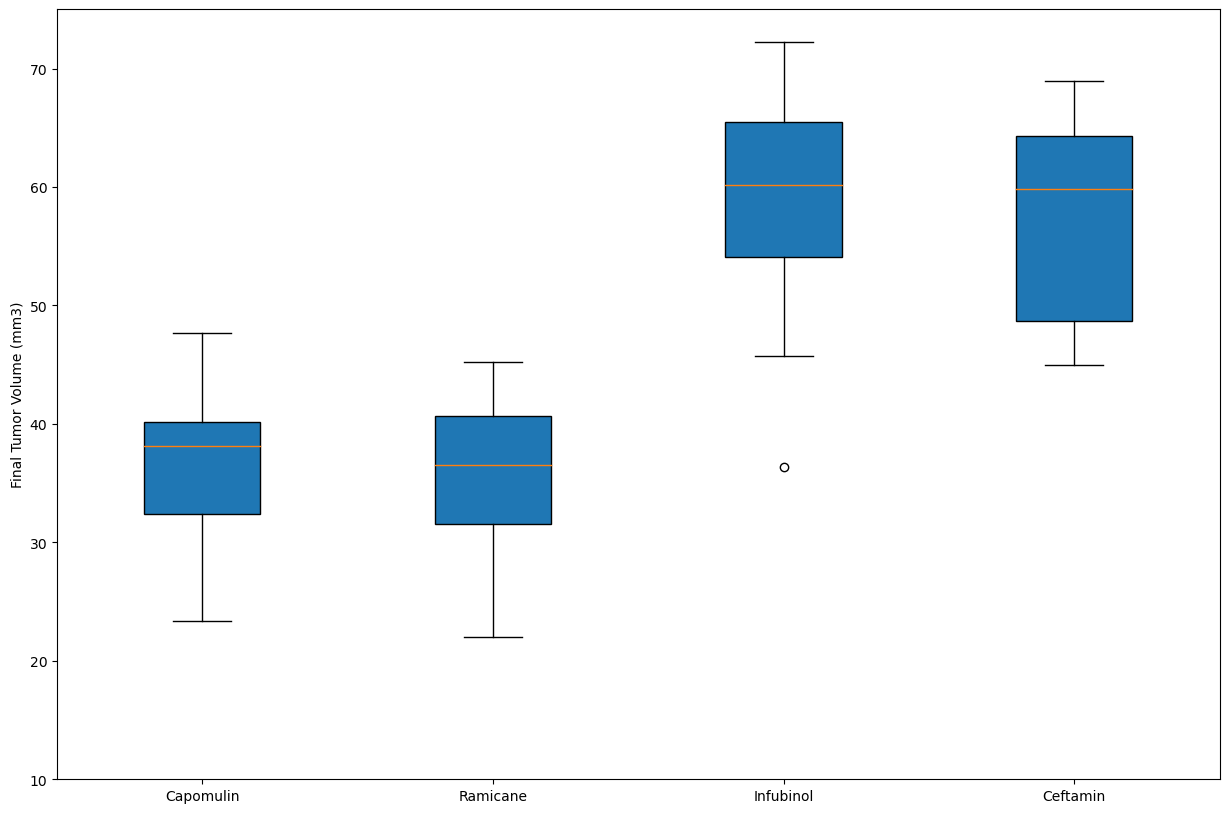

In [269]:
# Generate a box plot that shows the distrubution of the tumor volume for each treatment group.
capomulin_df = last_vol_df.loc[last_vol_df['Drug Regimen'] == 'Capomulin']
ramicane_df = last_vol_df.loc[last_vol_df['Drug Regimen'] == 'Ramicane']
infubinol_df = last_vol_df.loc[last_vol_df['Drug Regimen'] == 'Infubinol']
ceftamin_df = last_vol_df.loc[last_vol_df['Drug Regimen'] == 'Ceftamin']

data_to_plot = [capomulin_df['Tumor Volume (mm3)'], ramicane_df['Tumor Volume (mm3)'], infubinol_df['Tumor Volume (mm3)'], ceftamin_df['Tumor Volume (mm3)']]
labels= ['Capomulin', 'Ramicane', 'Infubinol','Ceftamin']

fig1, ax1 = plt.subplots(figsize=(15, 10))
ax1.set_ylabel('Final Tumor Volume (mm3)')
ax1.boxplot(data_to_plot, labels=labels, widths = 0.4, patch_artist=True,vert=True)

plt.ylim(10, 75)
plt.show()


## Line and Scatter Plots

Text(0, 0.5, 'Tumor Volume (mm3)')

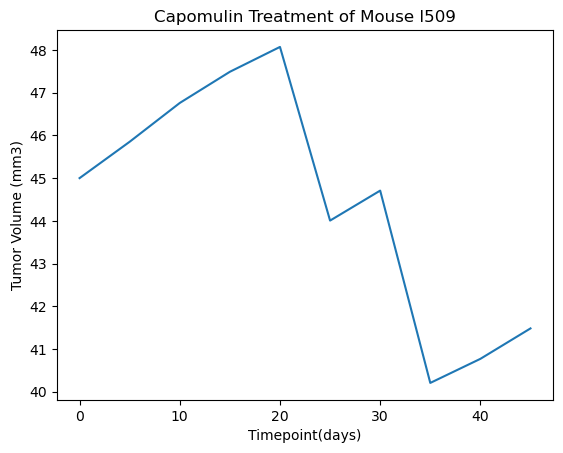

In [293]:
# Generate a line plot of tumor volume vs. time point for a mouse treated with Capomulin
x_axis = line_plot_df['Timepoint']
y_axis = line_plot_df['Tumor Volume (mm3)']
plt.plot(x_axis, y_axis)
plt.title('Capomulin Treatment of Mouse l509')
plt.xlabel('Timepoint(days)')
plt.ylabel('Tumor Volume (mm3)')


/var/folders/r2/h9k8ftds3m993z3_pdlm5rqm0000gn/T/ipykernel_77611/3184140490.py:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  average_vol_df = capomulin_clean_df.groupby(['Mouse ID']).mean()


Text(0, 0.5, 'Averag Tumor Volume (mm3)')

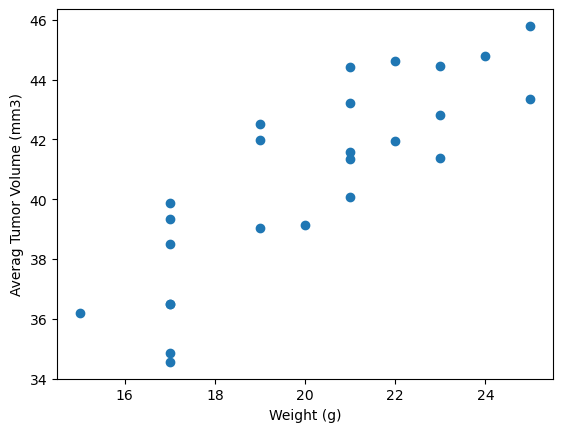

In [309]:
# Generate a scatter plot of average tumor volume vs. mouse weight for the Capomulin regimen
average_vol_df = capomulin_clean_df.groupby(['Mouse ID']).mean()
x_axis = average_vol_df['Weight (g)']
y_axis = average_vol_df['Tumor Volume (mm3)']
plt.scatter(x_axis,y_axis)
plt.xlabel('Weight (g)')
plt.ylabel('Averag Tumor Volume (mm3)')

# average_vol_df

## Correlation and Regression

The correlation coefficient between mouse weight and average tumor volume for the Capomulin regimen is 0.84


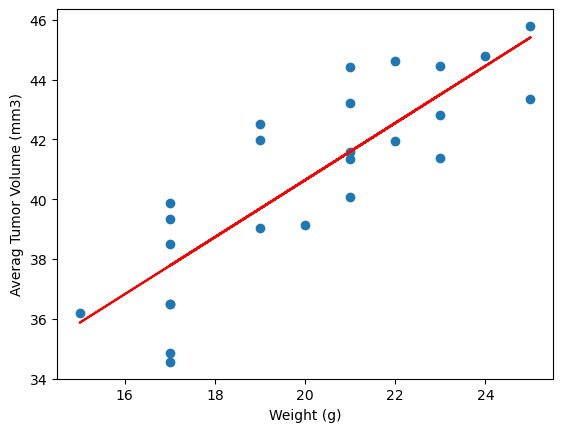

In [327]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen
print(f"The correlation coefficient between mouse weight and average tumor volume for the Capomulin regimen is {round(st.pearsonr(x_axis,y_axis)[0],2)}")

plt.scatter(x_axis,y_axis)
plt.xlabel('Weight (g)')
plt.ylabel('Averag Tumor Volume (mm3)')

# Perform a linear regression on weight versus average tumor volume

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_axis, y_axis)
regress_values = x_axis * slope + intercept

plt.plot(x_axis,regress_values,color='red')